In [478]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import random
import time
from scipy import optimize

In [479]:
# PARAMETRS
# w = 16.3362817987    # рад/с
w = 11




L = 1.4       # м
g = 9.81    # м/с^2
n = 50
l = L/n
r = 0.05
ti = time.clock()

In [480]:
# Версия 2
# def eq(x):
#     res = np.zeros([n])
#     sum = 0
    
    
#     for j in np.arange(0,n,1):
#         for k in range(j, n+1, 1):
#             for i in range(k):
#                 sum += w**2 * l * x[i] * np.sqrt(1 - x[j]**2)
#         sum += - g * (n - j + 1) * x[j]
#         res[j] = sum
#         sum = 0
    
#     return res

In [481]:
# Версия 1
# def eq(x):
#     res = np.zeros([n])
#     sum = 0
    
    
#     for j in np.arange(1,n+1,1):
#         for k in range(j, n+1, 1):
#             for i in range(k):
#                 sum += w**2 * l * x[i] * np.sqrt(1 - x[j]**2)
#         sum += - g * (n - j + 1) * x[j]
#         res[j] = sum
#         sum = 0
    
#     return res

In [482]:
# Версия 3
def eq(x):
    res = np.zeros([n])
    Sum = 0

    for i in range(1, n + 1, 1):

        for j in range(1, i + 1, 1):
            Sum += np.sin(x[j-1])
        
        Sum = Sum * (n - i + 1)

        for k in range(i + 1, n + 1, 1):
            Sum += (n - k + 1) * np.sin(x[k-1])
        
        Sum = Sum * w**2 * l * np.cos(x[i-1])
        Sum = Sum - g * (n - i + 1) * np.sin(x[i-1]) + (n - i + 1) * w**2 * r * np.cos(x[i-1])
        res[i-1] = Sum
        Sum = 0
    return res
 



In [483]:
def jacobian(f, x):
    h = 1.0e-4
    n = len(x)
    Jac = np.zeros([n,n])
    f0 = f(x)
    for i in np.arange(0,n,1):
        tt = x[i]
        x[i] = tt + h
        f1 = f(x)
        x[i] = tt
        Jac[:,i] = (f1 - f0)/h
    return Jac, f0

In [484]:
def newton(f, x, tol=1.0e-9):
    iterMax = 1000
    for i in range(iterMax):
        Jac, f0 = jacobian(f, x)
        if np.sqrt(np.dot(f0, f0) / len(x)) < tol:
            return x, i
        dx = np.linalg.solve(Jac, f0)
        x = x - dx
    print("Too many iterations")
    return x, i

In [485]:
x0 = np.zeros([n])
# x0 += -np.pi/20
x0+=-np.pi/12
# x0 += np.pi/120
# x0 += 
# x0 = np.pi * np.random.random_sample(len(x0)) - np.pi/2

In [486]:
x, it = newton(eq, x0)

In [487]:
eq(x)

array([-2.75292678e-10, -2.74326339e-10, -2.73132628e-10, -2.71825229e-10,
       -2.70858891e-10, -2.69722022e-10, -2.68983058e-10, -2.68414624e-10,
       -2.67732503e-10, -2.67391442e-10, -2.66993538e-10, -2.66624056e-10,
       -2.66140887e-10, -2.65544031e-10, -2.64918754e-10, -2.64151367e-10,
       -2.63298716e-10, -2.62872391e-10, -2.62701860e-10, -2.63355560e-10,
       -2.64662958e-10, -2.66737743e-10, -2.69722022e-10, -2.73274736e-10,
       -2.76855872e-10, -2.79925416e-10, -2.82085466e-10, -2.82199153e-10,
       -2.79726464e-10, -2.73985279e-10, -2.64677169e-10, -2.52057930e-10,
       -2.37037057e-10, -2.21660912e-10, -2.09510631e-10, -2.04948947e-10,
       -2.09624318e-10, -2.18733476e-10, -2.19785079e-10, -2.01026751e-10,
       -1.63822733e-10, -1.22611254e-10, -9.24345045e-11, -7.77760079e-11,
       -7.34132755e-11, -7.17221837e-11, -6.70876688e-11, -5.71436232e-11,
       -4.17941237e-11, -2.21911378e-11])

In [488]:
print('Solution:\n', x)
print('Newton iter = ', it)
print('time: ', round(time.clock() - ti, 3), 'seconds')

Solution:
 [ 8.77483023e-02  7.64167614e-02  6.40451539e-02  5.06571436e-02
  3.62880583e-02  2.09861046e-02  4.81350157e-03 -1.21525263e-02
 -2.98189565e-02 -4.80764337e-02 -6.67990377e-02 -8.58443809e-02
 -1.05054036e-01 -1.24254263e-01 -1.43256964e-01 -1.61860768e-01
 -1.79852102e-01 -1.97006081e-01 -2.13087053e-01 -2.27848590e-01
 -2.41032765e-01 -2.52368543e-01 -2.61569158e-01 -2.68328381e-01
 -2.72315657e-01 -2.73170155e-01 -2.70493974e-01 -2.63844939e-01
 -2.52729896e-01 -2.36600078e-01 -2.14851158e-01 -1.86832186e-01
 -1.51869565e-01 -1.09314281e-01 -5.86214183e-02  5.31822703e-04
  6.80938156e-02  1.43476769e-01  2.25437881e-01  3.12073388e-01
  4.00977687e-01  4.89555420e-01  5.75394604e-01  6.56573767e-01
  7.31815462e-01  8.00478380e-01  8.62441339e-01  9.17947254e-01
  9.67456762e-01  1.01153467e+00]
Newton iter =  6
time:  3.707 seconds


In [489]:
res_x = np.zeros([len(x)+1])

In [490]:
res_x[0] = 0.05
for i in range(len(x)):
    res_x[i+1] = res_x[i] + l * np.sin(x[i])

In [491]:
res_y = np.zeros([len(x)+1])

In [492]:
res_y[0] = 0
for i in range(len(x)):
    res_y[i+1] = res_y[i] + l * np.cos(x[i])
    print(res_y[i+1])
for i in range(len(x) + 1):
    res_y[i] = -res_y[i]

0.027892272445775787
0.05581055892141709
0.08375315360317659
0.11171723523838609
0.13969880173686025
0.1676926361309251
0.19569231175438798
0.223690244205305
0.2516777967453787
0.27964544416896897
0.30758299783430054
0.3354798915675303
0.3633255247095285
0.3911096549551469
0.41882283018239214
0.4464568455465982
0.47400521003200136
0.5014636055950761
0.528830321999295
0.556106651202338
0.5832972262479231
0.6104102903392017
0.6374578812208958
0.6644559130624185
0.691424131389095
0.7183859046837117
0.7453677972514182
0.7723988398438983
0.7995093757483754
0.8267293105785054
0.8540855384560033
0.8815982706070196
0.9092759896471577
0.9371088616054389
0.9650607647918727
0.9930607608321774
1.0209958711631086
1.0487081670541718
1.0759996640004323
1.1026472365144806
1.1284262716022475
1.153137447666187
1.176628821526918
1.1988072931344713
1.2196382430840529
1.2391364199842874
1.257352810483678
1.2743614678129664
1.2902485440811646
1.305104237772872


Text(0, 0.5, 'y, м')

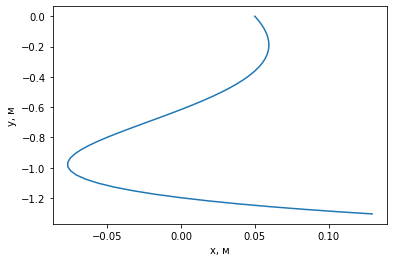

In [493]:
plt.plot(res_x, res_y)
plt.xlabel("x, м")
plt.ylabel("y, м")

In [494]:
for i in range(len(res_x) - 1):
    if res_x[i] * res_x[i+1] < 0:
        if abs(res_x[i]) < abs(res_x[i+1]):
            print(res_y[i] * 100)
        else: 
            print(res_y[i+1] * 100)


-61.04102903392017
-119.88072931344713


In [495]:
print(res_x)
print(res_y)

[ 0.05        0.0524538   0.05459139  0.05638343  0.05780122  0.05881706
  0.05940463  0.05953941  0.05919915  0.05836434  0.05701872  0.05514973
  0.05274904  0.04981294  0.04634276  0.04234527  0.03783294  0.03282418
  0.02734363  0.02142224  0.01509753  0.00841378  0.00142223 -0.00581848
 -0.01324184 -0.02077279 -0.02832678 -0.03580859 -0.04311083 -0.05011218
 -0.05667534 -0.062645   -0.06784592 -0.07208194 -0.07513665 -0.07677711
 -0.07676222 -0.07485706 -0.07085348 -0.06459455 -0.05599764 -0.04506872
 -0.03190218 -0.01666553  0.00042585  0.01913605  0.03923135  0.06049548
  0.08273745  0.10579392  0.12952804]
[-0.         -0.02789227 -0.05581056 -0.08375315 -0.11171724 -0.1396988
 -0.16769264 -0.19569231 -0.22369024 -0.2516778  -0.27964544 -0.307583
 -0.33547989 -0.36332552 -0.39110965 -0.41882283 -0.44645685 -0.47400521
 -0.50146361 -0.52883032 -0.55610665 -0.58329723 -0.61041029 -0.63745788
 -0.66445591 -0.69142413 -0.7183859  -0.7453678  -0.77239884 -0.79950938
 -0.82672931 -0.

In [496]:
for i in res_y:
    print(i)

-0.0
-0.027892272445775787
-0.05581055892141709
-0.08375315360317659
-0.11171723523838609
-0.13969880173686025
-0.1676926361309251
-0.19569231175438798
-0.223690244205305
-0.2516777967453787
-0.27964544416896897
-0.30758299783430054
-0.3354798915675303
-0.3633255247095285
-0.3911096549551469
-0.41882283018239214
-0.4464568455465982
-0.47400521003200136
-0.5014636055950761
-0.528830321999295
-0.556106651202338
-0.5832972262479231
-0.6104102903392017
-0.6374578812208958
-0.6644559130624185
-0.691424131389095
-0.7183859046837117
-0.7453677972514182
-0.7723988398438983
-0.7995093757483754
-0.8267293105785054
-0.8540855384560033
-0.8815982706070196
-0.9092759896471577
-0.9371088616054389
-0.9650607647918727
-0.9930607608321774
-1.0209958711631086
-1.0487081670541718
-1.0759996640004323
-1.1026472365144806
-1.1284262716022475
-1.153137447666187
-1.176628821526918
-1.1988072931344713
-1.2196382430840529
-1.2391364199842874
-1.257352810483678
-1.2743614678129664
-1.2902485440811646
-1.30510423